<a href="https://colab.research.google.com/github/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/Visualize%20convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.display import HTML
from IPython.display import Image
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

if 'google.colab' in str(get_ipython()):    
    ! git clone -b master https://github.com/edsonportosilva/ElectricCircuits
    ! sudo apt update
    ! sudo apt install imagemagick
    from os import chdir as cd
    cd('/content/ElectricCircuits/')
    ! pip install .


Cloning into 'ElectricCircuits'...
remote: Enumerating objects: 1490, done.
remote: Counting objects: 100% (477/477), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 1490 (delta 308), reused 419 (delta 263), pack-reused 1013
Receiving objects: 100% (1490/1490), 214.81 MiB | 19.49 MiB/s, done.
Resolving deltas: 100% (893/893), done.
Updating files: 100% (314/314), done.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:8 ht

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from circuit.utils import round_expr, symdisp, symplot, genConvGIF

# temp workaround
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = False

# Visualize the convolution between two real functions defined with Sympy



**Define time variable in sympy**

In [4]:
t = sp.symbols('t', real=True)

**Define functions:** $x(t)$, $h(t)$

In [5]:
x = sp.Piecewise((0, t<0), 
                  (1, (t>=0)&(t<2)), 
                  (1, (t>=2)))

h = sp.Piecewise((0, t<0),                   
                 (5*sp.exp(-t)*sp.sin(5*t), (t>=0)))

symdisp('x(t) = ', round_expr(x,2))
symdisp('h(t) = ', round_expr(h,2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

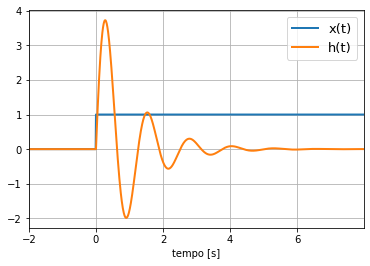

In [6]:
interval = np.arange(-2, 8, 0.01)
symplot(t, [x, h], interval, ['x(t)','h(t)'])

**Visualize convolution:** $y(t) = h(t)\ast x(t) =\int_{-\infty}^{\infty} h(\tau) x(t-\tau) d\tau$

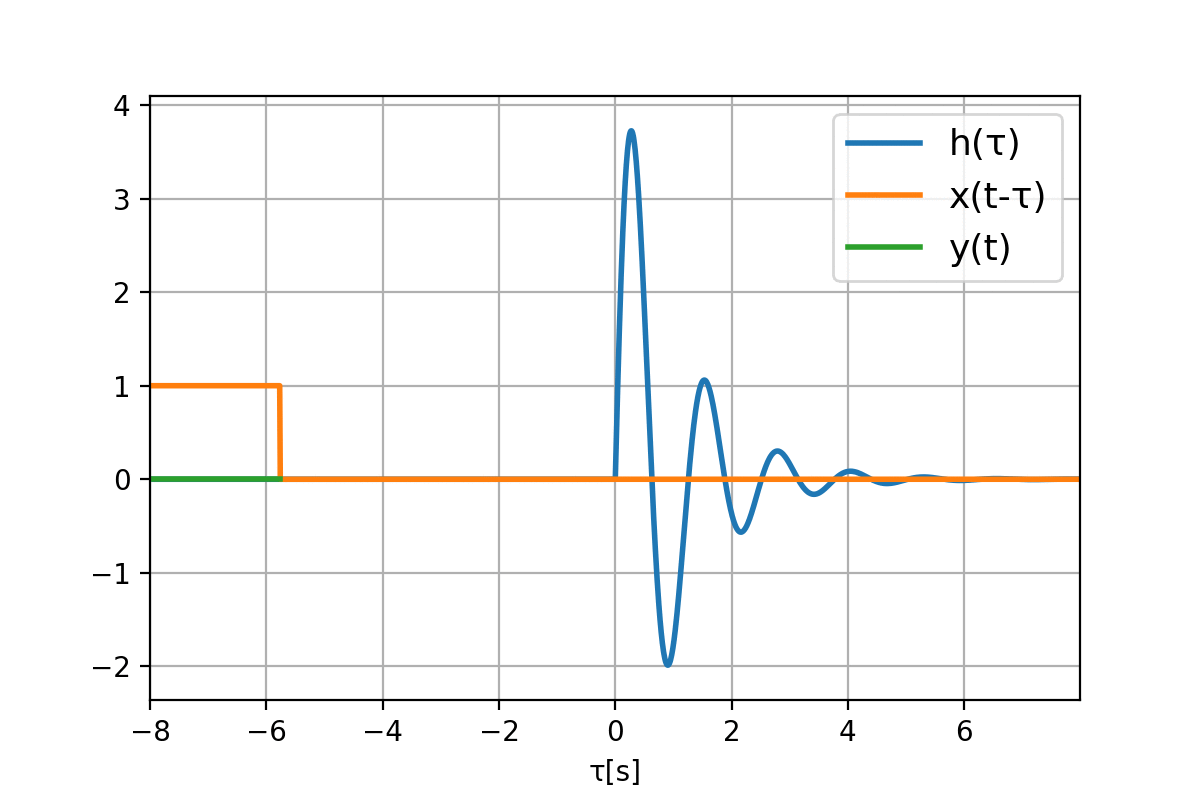

In [7]:
ti = -6  # animation starts at this time
tf = 8   # animation ends at this time
τ_max = 8

delay = np.arange(-τ_max, τ_max, 0.01) # must be symmetric w.r.t 0

figName  = './Jupyter notebooks/figures/convolutionFig1.gif'

genConvGIF(x, h, t, delay, ti, tf,\
           figName, xlabel= 'τ[s]', ylabel=['h(τ)', 'x(t-τ)','y(t)'],\
           fram=50, inter=150, plotConv=True)

Image('./Jupyter notebooks/figures/convolutionFig1.gif', width=500)

**Define functions:** $x(t)$, $h(t)$

In [8]:
x = sp.Piecewise((0, t<0), 
                  (1, (t>=0)&(t<2)), 
                  (0, (t>=2)))

h = sp.Piecewise((0, t<0),                   
                 (2*sp.exp(-2*t), (t>=0)))

symdisp('x(t) = ', round_expr(x,2))
symdisp('h(t) = ', round_expr(h,2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

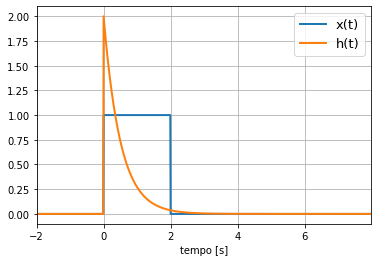

In [9]:
interval = np.arange(-2, 8, 0.01)
symplot(t, [x, h], interval, ['x(t)','h(t)'])

**Visualize convolution:** $y(t) = h(t)\ast x(t) =\int_{-\infty}^{\infty} h(\tau) x(t-\tau) d\tau$

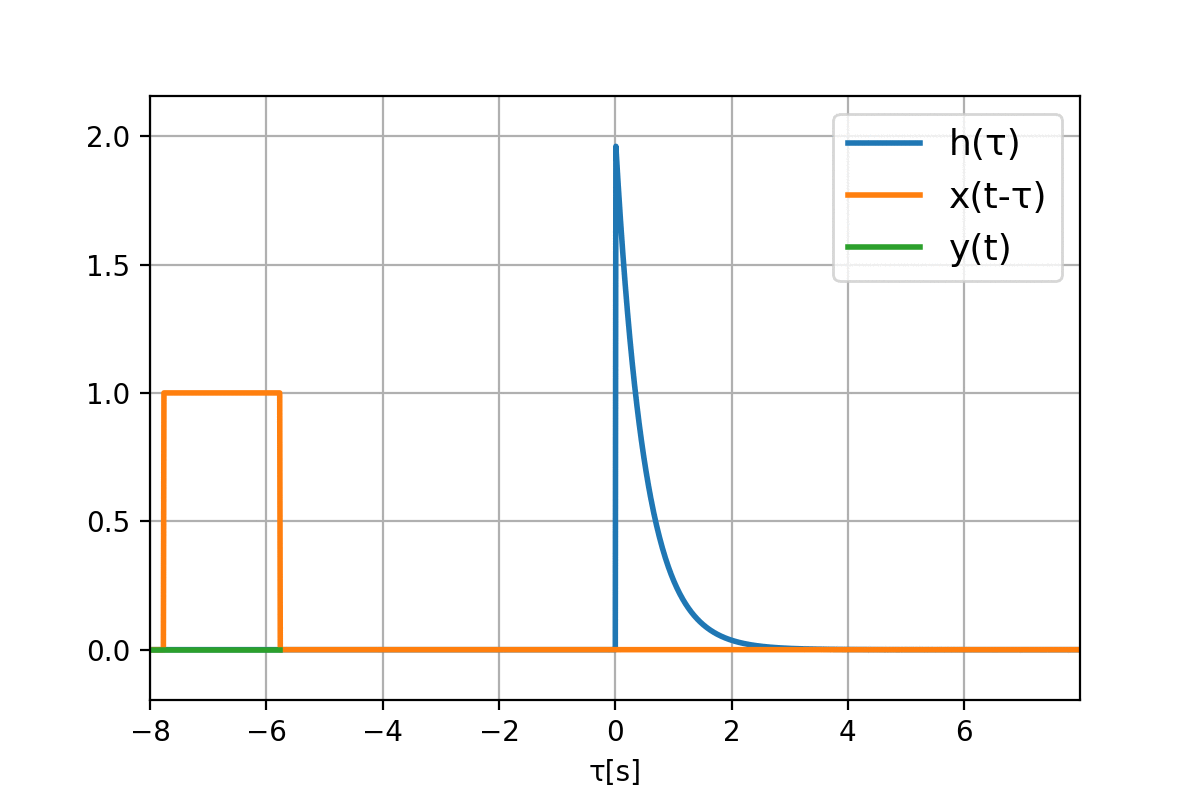

In [10]:
ti = -6 # animation starts at this time
tf = 8  # animation end at this time
τ_max = 8

atraso = np.arange(-τ_max, τ_max, 0.01) # must be symmetric w.r.t 0

figName  = './Jupyter notebooks/figures/convolutionFig2.gif'

genConvGIF(x, h, t, delay, ti, tf,\
           figName, xlabel= 'τ[s]', ylabel=['h(τ)', 'x(t-τ)','y(t)'],\
           fram=50, inter=150, plotConv=True)

Image('./Jupyter notebooks/figures/convolutionFig2.gif', width=500)